In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1    

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | albany
Processing Record 2 of Set 13 | mogadishu
Processing Record 3 of Set 13 | maningrida
Processing Record 4 of Set 13 | maldonado
Processing Record 5 of Set 13 | carnarvon
Processing Record 6 of Set 13 | rikitea
Processing Record 7 of Set 13 | provideniya
Processing Record 8 of Set 13 | kaitangata
Processing Record 9 of Set 13 | praxedis guerrero
Processing Record 10 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 13 | punta arenas
Processing Record 12 of Set 13 | ribeira grande
Processing Record 13 of Set 13 | penalva
Processing Record 14 of Set 13 | montepuez
Processing Record 15 of Set 13 | kutum
Processing Record 16 of Set 13 | margate
Processing Record 17 of Set 13 | bethel
Processing Record 18 of Set 13 | saint-philippe
Processing Record 19 of Set 13 | minab
Processing Record 20 of Set 13 | thompson
Processing Record 21 of Set 13 | ushuaia
Processing Rec

Processing Record 32 of Set 16 | sampit
Processing Record 33 of Set 16 | surovikino
Processing Record 34 of Set 16 | rehoboth
Processing Record 35 of Set 16 | khovu-aksy
Processing Record 36 of Set 16 | faanui
Processing Record 37 of Set 16 | aswan
Processing Record 38 of Set 16 | sunrise manor
Processing Record 39 of Set 16 | energetik
Processing Record 40 of Set 16 | palmas
Processing Record 41 of Set 16 | tautira
Processing Record 42 of Set 16 | bubaque
Processing Record 43 of Set 16 | sarangani
Processing Record 44 of Set 16 | ambovombe
Processing Record 45 of Set 16 | kavaratti
Processing Record 46 of Set 16 | port-gentil
Processing Record 47 of Set 16 | samarai
Processing Record 48 of Set 16 | torbay
Processing Record 49 of Set 16 | lebu
Processing Record 50 of Set 16 | cheuskiny
City not found. Skipping...
Processing Record 1 of Set 17 | castro
Processing Record 2 of Set 17 | rawson
Processing Record 3 of Set 17 | samusu
City not found. Skipping...
Processing Record 4 of Set 17 

Processing Record 16 of Set 20 | springbok
Processing Record 17 of Set 20 | pontal do parana
Processing Record 18 of Set 20 | tortoli
Processing Record 19 of Set 20 | tombouctou
Processing Record 20 of Set 20 | sorland
Processing Record 21 of Set 20 | yar-sale
Processing Record 22 of Set 20 | piet retief
Processing Record 23 of Set 20 | port augusta
Processing Record 24 of Set 20 | beringovskiy
Processing Record 25 of Set 20 | mecca
Processing Record 26 of Set 20 | gumushane
City not found. Skipping...
Processing Record 27 of Set 20 | vicuna
Processing Record 28 of Set 20 | riviere-au-renard
Processing Record 29 of Set 20 | martapura
Processing Record 30 of Set 20 | anadyr
Processing Record 31 of Set 20 | sakaiminato
Processing Record 32 of Set 20 | fort abbas
Processing Record 33 of Set 20 | mentougou
Processing Record 34 of Set 20 | odweyne
Processing Record 35 of Set 20 | pinar del rio
Processing Record 36 of Set 20 | bucerias
Processing Record 37 of Set 20 | necochea
Processing Rec

Processing Record 6 of Set 24 | torrijos
Processing Record 7 of Set 24 | seoul
Processing Record 8 of Set 24 | kota kinabalu
Processing Record 9 of Set 24 | imbituba
Processing Record 10 of Set 24 | skelleftea
Processing Record 11 of Set 24 | palimbang
Processing Record 12 of Set 24 | hauterive
Processing Record 13 of Set 24 | olinda
Processing Record 14 of Set 24 | amapa
Processing Record 15 of Set 24 | mutis
Processing Record 16 of Set 24 | katsuura
Processing Record 17 of Set 24 | tsienyane
City not found. Skipping...
Processing Record 18 of Set 24 | inhambane
Processing Record 19 of Set 24 | cumaribo
City not found. Skipping...
Processing Record 20 of Set 24 | katobu
Processing Record 21 of Set 24 | kushiro
Processing Record 22 of Set 24 | axim
Processing Record 23 of Set 24 | curup
Processing Record 24 of Set 24 | dingle
Processing Record 25 of Set 24 | nguiu
City not found. Skipping...
Processing Record 26 of Set 24 | yumen
Processing Record 27 of Set 24 | banjar
Processing Recor

In [10]:
len(city_data)

561

In [11]:
# Convert the array of dictionaires to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,29.68,77,100,2.80,US,2021-12-08 03:02:40
1,Mogadishu,2.0371,45.3438,78.33,78,32,10.51,SO,2021-12-08 03:03:14
2,Maningrida,-12.0667,134.2667,93.72,47,89,10.20,AU,2021-12-08 03:03:15
3,Maldonado,-34.6667,-54.9167,61.99,88,0,10.67,UY,2021-12-08 03:03:15
4,Carnarvon,-24.8667,113.6333,78.60,66,1,9.84,AU,2021-12-08 03:03:16
5,Rikitea,-23.1203,-134.9692,75.13,61,94,18.19,PF,2021-12-08 03:03:16
6,Provideniya,64.3833,-173.3000,6.91,61,90,17.90,RU,2021-12-08 03:03:16
7,Kaitangata,-46.2817,169.8464,66.92,75,98,0.76,NZ,2021-12-08 03:03:17
8,Praxedis Guerrero,31.3667,-106.0167,59.29,30,1,3.02,MX,2021-12-08 03:03:17
9,Punta Arenas,-53.1500,-70.9167,41.11,75,20,11.50,CL,2021-12-08 03:03:18


In [12]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-12-08 03:02:40,42.6001,-73.9662,29.68,77,100,2.80
1,Mogadishu,SO,2021-12-08 03:03:14,2.0371,45.3438,78.33,78,32,10.51
2,Maningrida,AU,2021-12-08 03:03:15,-12.0667,134.2667,93.72,47,89,10.20
3,Maldonado,UY,2021-12-08 03:03:15,-34.6667,-54.9167,61.99,88,0,10.67
4,Carnarvon,AU,2021-12-08 03:03:16,-24.8667,113.6333,78.60,66,1,9.84
5,Rikitea,PF,2021-12-08 03:03:16,-23.1203,-134.9692,75.13,61,94,18.19
6,Provideniya,RU,2021-12-08 03:03:16,64.3833,-173.3000,6.91,61,90,17.90
7,Kaitangata,NZ,2021-12-08 03:03:17,-46.2817,169.8464,66.92,75,98,0.76
8,Praxedis Guerrero,MX,2021-12-08 03:03:17,31.3667,-106.0167,59.29,30,1,3.02
9,Punta Arenas,CL,2021-12-08 03:03:18,-53.1500,-70.9167,41.11,75,20,11.50


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

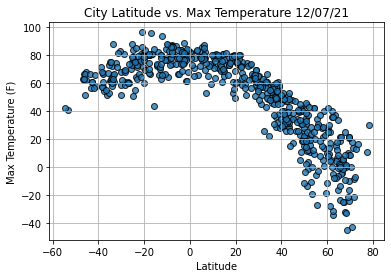

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

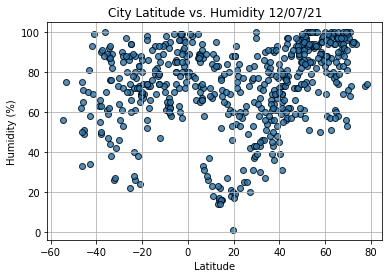

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

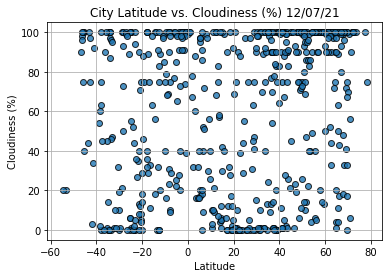

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

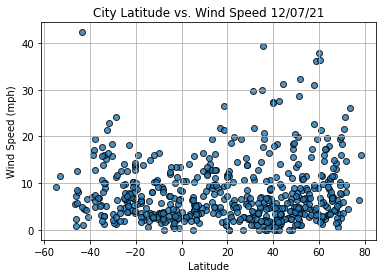

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                        Kutum
Country                        SD
Date          2021-12-08 03:03:19
Lat                          14.2
Lng                       24.6667
Max Temp                    60.89
Humidity                       22
Cloudiness                      4
Wind Speed                    7.7
Name: 13, dtype: object

In [21]:
city_data_df["Lat"]>=0

0       True
1       True
2      False
3      False
4      False
       ...  
556     True
557     True
558     True
559    False
560     True
Name: Lat, Length: 561, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-12-08 03:02:40,42.6001,-73.9662,29.68,77,100,2.80
1,Mogadishu,SO,2021-12-08 03:03:14,2.0371,45.3438,78.33,78,32,10.51
6,Provideniya,RU,2021-12-08 03:03:16,64.3833,-173.3000,6.91,61,90,17.90
8,Praxedis Guerrero,MX,2021-12-08 03:03:17,31.3667,-106.0167,59.29,30,1,3.02
10,Ribeira Grande,PT,2021-12-08 03:03:18,38.5167,-28.7000,60.69,61,83,10.67
...,...,...,...,...,...,...,...,...,...
555,Cockburn Town,TC,2021-12-08 03:01:59,21.4612,-71.1419,80.29,72,10,18.61
556,Polyarnyy,RU,2021-12-08 03:06:55,69.1989,33.4478,-21.53,100,41,7.85
557,Roald,NO,2021-12-08 03:06:55,62.5833,6.1333,36.09,51,33,17.27
558,Lyss,CH,2021-12-08 03:06:56,47.0741,7.3066,41.11,97,90,0.00


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-12-08 03:02:40,42.6001,-73.9662,29.68,77,100,2.80
1,Mogadishu,SO,2021-12-08 03:03:14,2.0371,45.3438,78.33,78,32,10.51
6,Provideniya,RU,2021-12-08 03:03:16,64.3833,-173.3000,6.91,61,90,17.90
8,Praxedis Guerrero,MX,2021-12-08 03:03:17,31.3667,-106.0167,59.29,30,1,3.02
10,Ribeira Grande,PT,2021-12-08 03:03:18,38.5167,-28.7000,60.69,61,83,10.67


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

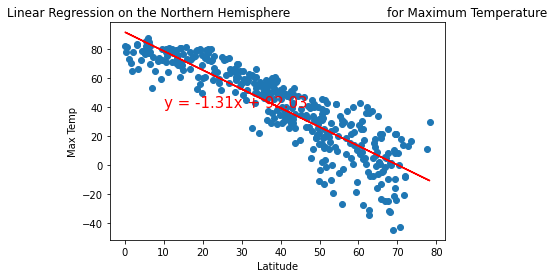

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

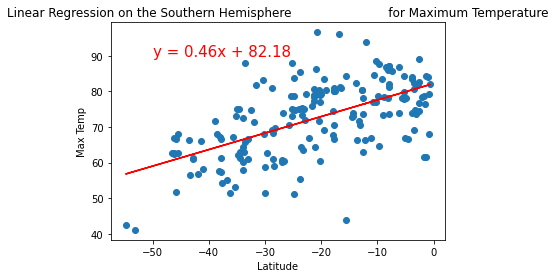

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

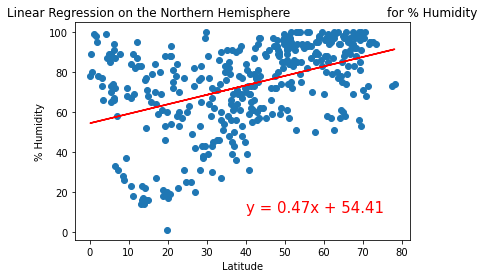

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

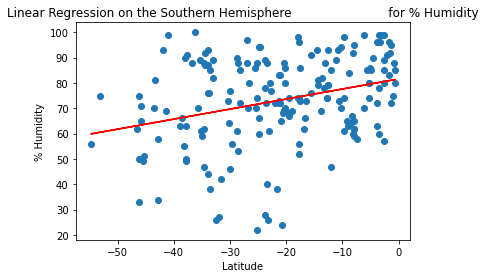

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

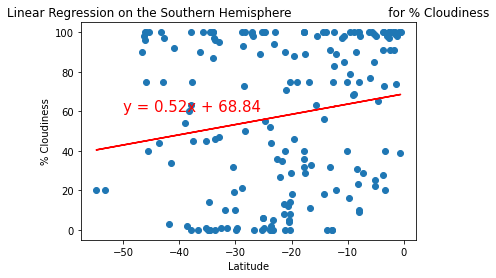

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

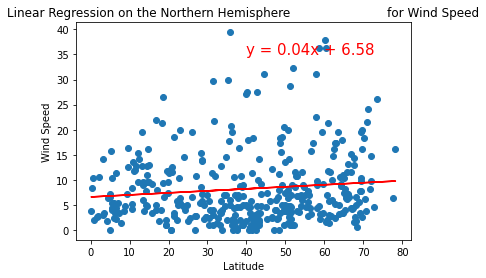

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

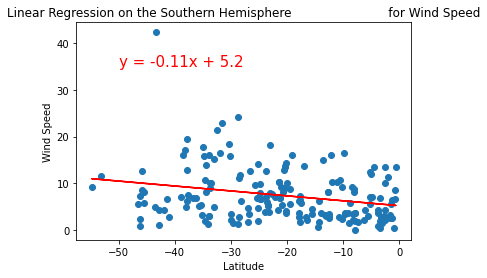

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))